In [53]:
import pandas as pd
import matplotlib.pyplot as plt

## Start with the biggest temporal resolution: months

In [2]:
month_ag = pd.read_csv("air_quality_conditions/counts_inpatient_month_aggregate/part-00000-tid-3618801196761401151-ef958687-0fb4-496d-83aa-ae1d3ba41a2c-16116-1-c000.csv")
month_detail = pd.read_csv("air_quality_conditions/counts_inpatient_month_detiail/part-00000-tid-6489324395486642748-b7d90bd8-1949-41b3-accd-6bc0a5b56a92-14756-1-c000.csv")

How many patient diagnoses are suppressed with the detailed data?

There are 41003 patient diagnoses in the detailed data and 43942 in the aggregate data, so there are **almost 3,000 suppressed diagnoses**.

In [19]:
total_ag_diag_month = month_ag['patient_count'].sum()
total_ag_diag_month

43942

In [20]:
total_det_diag_month = month_detail['patient_count'].sum()
total_det_diag_month

41003

In [22]:
total_ag_diag_month - total_det_diag_month

2939

What diagnoses do we have detailed data on at the monthly level?

In [42]:
month_detail['mapped_diagnosis'].unique()

array(['Dyspnea', 'Asmtha', 'Emesis', 'COPD'], dtype=object)

What is the distribution of diagnoses at the monthly level?

In [69]:
diag_by_month_det = month_detail[['patient_count', 'mapped_diagnosis', 'claim_month']].groupby(by=['claim_month', 'mapped_diagnosis']).sum().reset_index()

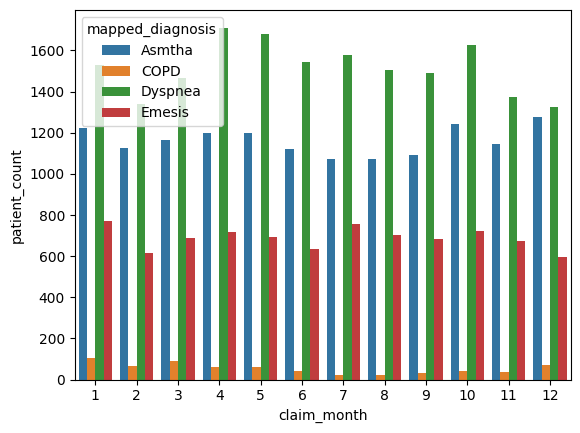

In [73]:
sns.barplot(diag_by_month_det, x="claim_month", y="patient_count", hue="mapped_diagnosis");

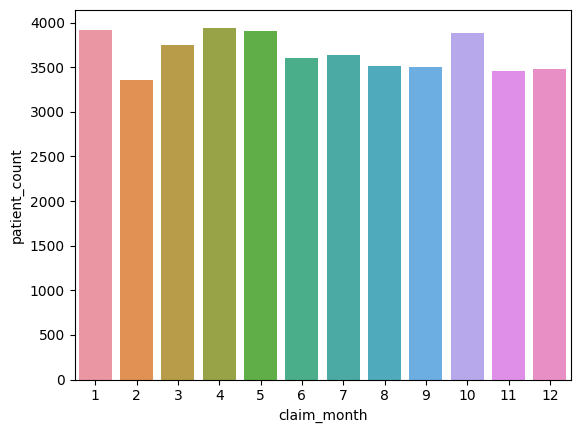

In [80]:
diag_by_month_ag = month_ag[['claim_month', 'patient_count']].groupby(by=['claim_month']).sum().reset_index()
sns.barplot(diag_by_month_ag, x='claim_month', y = 'patient_count');

## Going down: weeks

In [14]:
week_ag = pd.read_csv("air_quality_conditions/counts_inpatient_week_aggregate/part-00000-tid-8214748325817083534-0219f3e4-c50e-47d9-be7c-4a736b326825-13393-1-c000.csv")
week_detail = pd.read_csv("air_quality_conditions/counts_week_detail/part-00000-tid-8657216289066802515-e5a5b2cd-202f-4711-ae4d-f4e0dd28bc54-12033-1-c000.csv")

How many patient diagnoses are suppressed with the detailed data at the weekly level?

There are 30534 patient diagnoses in the detailed data and 39940 in the aggregate data, so there are **9,406 suppressed diagnoses** with the detailed data.

**AND** going from monthly to weekly, we lose about 4,000 in the aggregate data and 10,469 in the detailed data.

In [33]:
total_ag_diag_week = week_ag['patient_count'].sum()
total_ag_diag_week

39940

In [34]:
total_det_diag_week = week_detail['patient_count'].sum()
total_det_diag_week

30534

In [37]:
suppressed_at_week = total_ag_diag_week - total_det_diag_week
suppressed_month_to_week_ag = total_ag_diag_month - total_ag_diag_week
suppressed_month_to_week_det = total_det_diag_month - total_det_diag_week


suppressed_at_week, suppressed_month_to_week_ag, suppressed_month_to_week_det

(9406, 4002, 10469)

What diagnoses do we have detailed data on at the weekly level?

In [45]:
week_detail['mapped_diagnosis'].unique()

array(['Dyspnea', 'Emesis', 'Asmtha', 'COPD'], dtype=object)

In [82]:
diag_by_week_det = week_detail[['patient_count', 'mapped_diagnosis', 'claim_week']].groupby(by=['claim_week', 'mapped_diagnosis']).sum().reset_index()

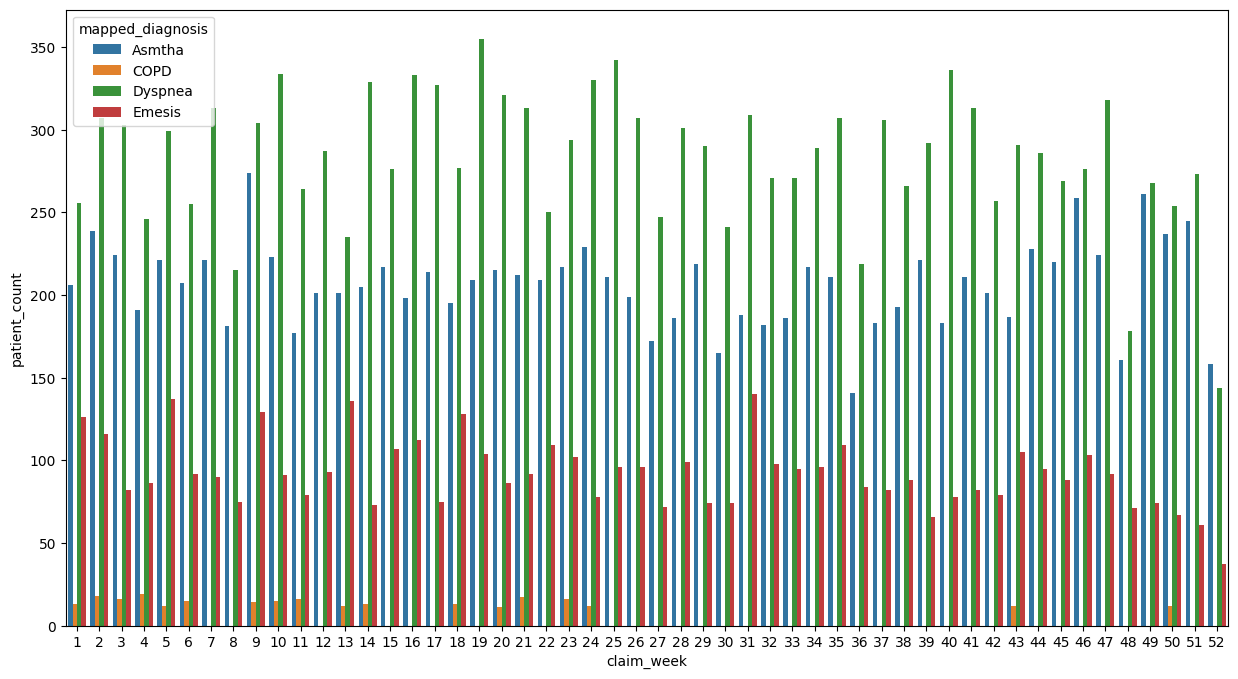

In [89]:
plt.figure(figsize=(15,8))
sns.barplot(diag_by_week_det, x="claim_week", y="patient_count", hue="mapped_diagnosis");

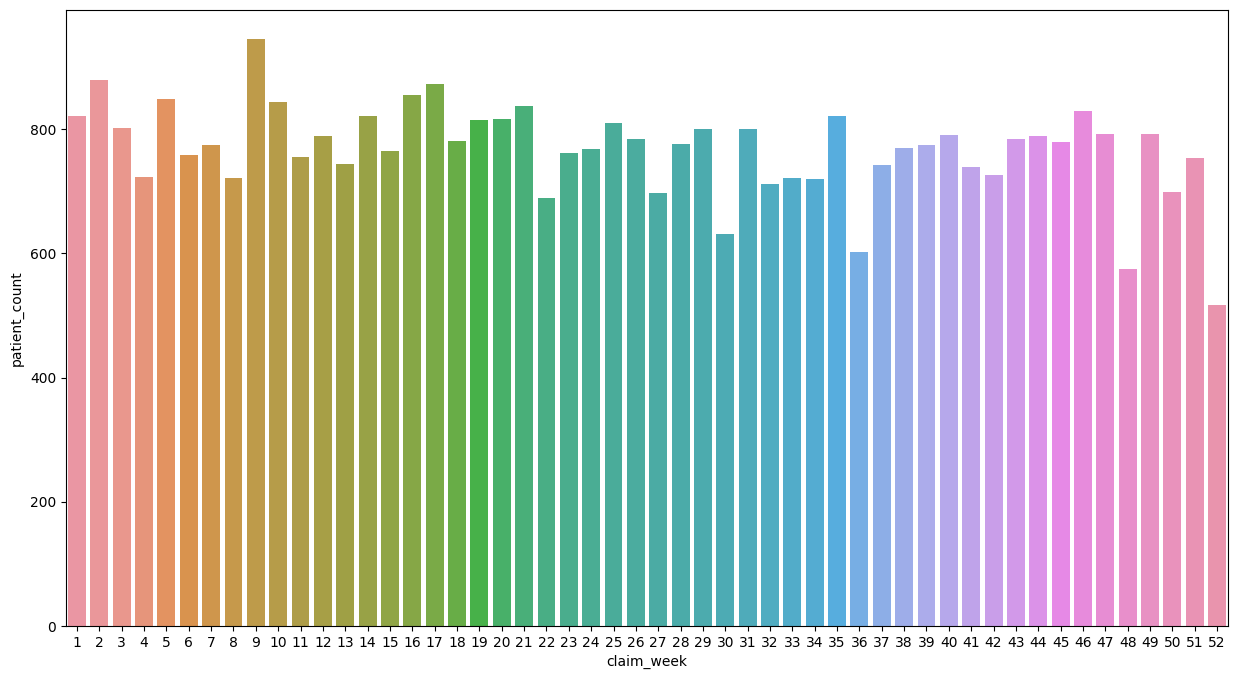

In [92]:
diag_by_week_ag = week_ag[['claim_week', 'patient_count']].groupby(by=['claim_week']).sum().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(diag_by_week_ag, x='claim_week', y = 'patient_count');

## At the bottom: days

In [28]:
day_ag = pd.read_csv("air_quality_conditions/counts_day_aggregate/part-00000-tid-3724355688536735415-5debdfe3-88ad-4df4-9b84-2760a56856a2-10755-1-c000.csv")
day_detail = pd.read_csv("air_quality_conditions/counts_day_detail/part-00000-tid-7166314835709092088-ae47b3e4-7532-4201-bdff-6e8ebc4a6d68-10385-1-c000.csv")

How many patient diagnoses are suppressed with the detailed data at the daily level?

There are 12008 patient diagnoses in the detailed data and 21755 in the aggregate data, so there are **9,747 suppressed diagnoses** with the detailed data.

**AND** going from monthly to daily, we lose about 22,000 in the aggregate data and 29,000 in the detailed data. From weekly to daily, we lose about 18,000 in the aggregate data and an additional 341 in the detailed data.

In [29]:
total_ag_diag_day = day_ag['patient_count'].sum()
total_ag_diag_day

21755

In [31]:
total_det_diag_day = day_detail['patient_count'].sum()
total_det_diag_day

12008

In [39]:
suppressed_at_day = total_ag_diag_day - total_det_diag_day
suppressed_month_to_day_ag = total_ag_diag_month - total_ag_diag_day
suppressed_month_to_day_det = total_det_diag_month - total_det_diag_day
suppressed_week_to_day_ag = total_ag_diag_week - total_ag_diag_day
suppressed_week_to_day_det = total_det_diag_week - total_det_diag_day

suppressed_at_day, suppressed_month_to_day_ag, suppressed_month_to_day_det, suppressed_week_to_day_ag, suppressed_week_to_day_det

(9747, 22187, 28995, 18185, 18526)

What diagnoses do we have detailed data on at the daily level?

In [47]:
day_detail['mapped_diagnosis'].unique()

array(['Asmtha', 'Dyspnea', 'Emesis'], dtype=object)

## Now let's look at locations

In [97]:
len(month_ag['PRVDR_NUM'].unique()), len(month_detail['PRVDR_NUM'].unique())

(64, 50)

In [98]:
len(week_ag['PRVDR_NUM'].unique()), len(week_detail['PRVDR_NUM'].unique())

(36, 23)

In [99]:
len(day_ag['PRVDR_NUM'].unique()), len(day_detail['PRVDR_NUM'].unique())

(10, 7)

In [100]:
day_detail['PRVDR_NUM'].unique()

array([460009, 460021, 460010, 460047, 462525, 460004, 460001])

Match `'PRVDR_NUM'` with facilities and locations



In [153]:
facilities = pd.read_csv('facility_locations.csv')

In [154]:
facilities['PRVDR_NUM'] = facilities['PRVDR_NUM'].astype('object')
month_ag_facilities = month_ag.merge(facilities, on='PRVDR_NUM', how='left')
assert(month_ag_facilities.shape[0] == month_ag.shape[0])

In [155]:
month_detail['PRVDR_NUM'] = month_detail['PRVDR_NUM'].astype('object')
month_detail_facilities = month_detail.merge(facilities, on='PRVDR_NUM', how='left')
assert(month_detail_facilities.shape[0] == month_detail.shape[0])

In [156]:
week_ag['PRVDR_NUM'] = week_ag['PRVDR_NUM'].astype('object')
week_ag_facilities = week_ag.merge(facilities, on='PRVDR_NUM', how='left')
assert(week_ag_facilities.shape[0] == week_ag.shape[0])

In [157]:
week_detail['PRVDR_NUM'] = week_detail['PRVDR_NUM'].astype('object')
week_detail_facilities = week_detail.merge(facilities, on='PRVDR_NUM', how='left')
assert(week_detail_facilities.shape[0] == week_detail.shape[0])

In [158]:
day_ag['PRVDR_NUM'] = day_ag['PRVDR_NUM'].astype('object')
day_ag_facilities = day_ag.merge(facilities, on='PRVDR_NUM', how='left')
assert(day_ag_facilities.shape[0] == day_ag.shape[0])

In [159]:
day_detail['PRVDR_NUM'] = day_detail['PRVDR_NUM'].astype('object')
day_detail_facilities = day_detail.merge(facilities, on ='PRVDR_NUM', how='left')
assert(day_detail_facilities.shape[0] == day_detail.shape[0])